## Histogram of daily returns

### Kurtosis: 
tells us about "tails" i.e. provides info. compared to normal distribution ("gaussian")

Positive = "fat tails"
Negative = "skinny tails"

mean= 0.000635578332225
std= 0.0133704908994


/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


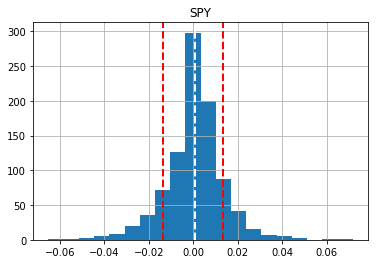

SPY    3.220278
dtype: float64


In [1]:
"""Plot a histogram"""
import os
import pandas as pd
import matplotlib.pyplot as plt



#--------function to get path of the symbol---------------------
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,index_col="Date",usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot(df_data):
    ax=df_data.plot(title="Incomplete Data",fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) -1
    daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

def test_run():
    # read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    #plot a histogram
    daily_returns.hist(bins=20)
    
    # get mean and standard deviation
    mean = daily_returns['SPY'].mean()
    print "mean=",mean
    std= daily_returns['SPY'].std()
    print "std=",std
    
    plt.axvline(mean,color='w',linestyle='dashed',linewidth=2)
    plt.axvline(std,color='r',linestyle='dashed',linewidth=2)
    plt.axvline(-std,color='r',linestyle='dashed',linewidth=2)
    
    plt.show()
    
    # compute kurtosis
    print daily_returns.kurtosis()
    
if __name__ == "__main__":
    test_run()

## Compare two histograms

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


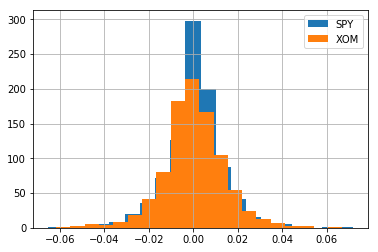

In [2]:
"""Plot two histograms"""
import os
import pandas as pd
import matplotlib.pyplot as plt



#--------function to get path of the symbol---------------------
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,
                            index_col="Date",
                            usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot_data(df_data):
    ax=df_data.plot(fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) -1
    daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

def test_run():
    # read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM']
    df = get_data(symbols, dates)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # compute and plot both histograms on the same chart
    daily_returns['SPY'].hist(bins=20, label="SPY")
    daily_returns['XOM'].hist(bins=20, label="XOM")
    plt.legend(loc='upper right') 
    plt.show()
    
if __name__ == "__main__":
    test_run()

# Scatterplots   and fitting a line with Linear Regression

### "Slope" = Beta  
####  How reactive the stock is to the market i.e. Higher number equates to stock increasing

### "Alpha" = positive - returns more than overall market & negative - returns less than overall market

## Mistake to avoid:  Slope != Correlation
### Correlation = how tightly data fits the line                 

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


beta_XOM=  0.850746223673
alpha_XOM=  -0.00024686727668


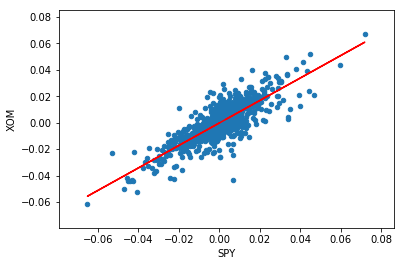

beta_GLD=  0.0597611348322
alpha_GLD=  0.00074788111616


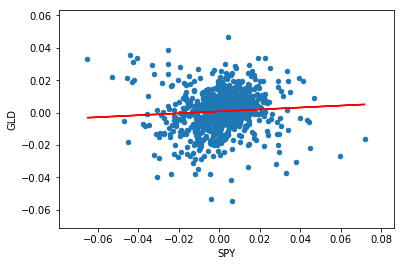

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [3]:
"""Scatterplots"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

 
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,
                            index_col="Date",
                            usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot_data(df_data):
    ax=df_data.plot(fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) -1
    daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

def test_run():
    # read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM', 'GLD']
    df = get_data(symbols, dates)
     
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    #--------------Scatterplot SPY vs XOM--------------------
    daily_returns.plot(kind='scatter', x='SPY',y='XOM')
    beta_XOM,alpha_XOM = np.polyfit(daily_returns['SPY'],
                                    daily_returns['XOM'],
                                   1)
    print "beta_XOM= ",beta_XOM
    print "alpha_XOM= ",alpha_XOM
    # fitting a line with, "y=mx+b"
    plt.plot(daily_returns['SPY'], 
             beta_XOM*daily_returns['SPY'] + alpha_XOM, 
             '-',
            color='r')
    plt.show()
    
    
    #-------------Scatterplot SPY vs GLD------------------
    daily_returns.plot(kind='scatter', x='SPY',y='GLD')
    beta_GLD,alpha_GLD = np.polyfit(daily_returns['SPY'],
                                    daily_returns['GLD'],
                                   1)
    print "beta_GLD= ",beta_GLD
    print "alpha_GLD= ",alpha_GLD
    # fitting a line with, "y=mx+b"
    plt.plot(daily_returns['SPY'], 
             beta_GLD*daily_returns['SPY'] + alpha_GLD, 
             '-',
            color='r')
    plt.show()
    
    #-----------Calculate correlation coefficient----------------
    # method used = 'pearson'
    print daily_returns.corr(method='pearson')
    
    
    
    #plot_data(daily_returns, title="Daily returns", 
    #         ylabel="Daily returns")
    
    
    
    
if __name__ == "__main__":
    test_run()


## Results:
### beta (*how stock moved with respect to SPY):
    - XOM > GLD  ; thus, XOM was more reactive to the market compared than GLD

### alpha (*how well it performed with respect to SPY):
    -  XOM < GLD ; thus, GLD performed better than XOM 

### correlation (* how closely the dots fit the line (*less in GLD; more in XOM):
    - SPY to XOM are MORE correlated THAN SPY to GLD
   